In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("D:\AI ML DL\heart disease prediction\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

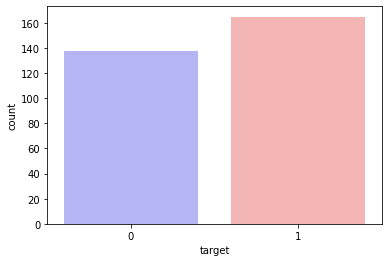

In [8]:
sns.countplot(x="target",data = df,palette="bwr")
plt.show()

In [10]:
count_no_disease = len(df[df.target==0])
count_have_disease = len(df[df.target==1])
print("Percentage of patients not have disease: {:.2f}%".format((count_no_disease/(len(df.target))*100)))
print("Percentage of patients have disease: {:.2f}%".format((count_have_disease/(len(df.target))*100)))

Percentage of patients not have disease: 45.54%
Percentage of patients have disease: 54.46%


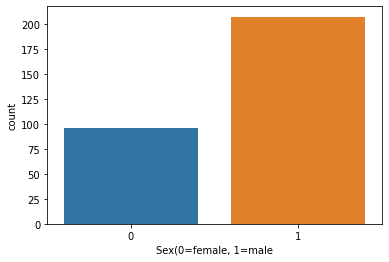

In [11]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex(0=female, 1=male")
plt.show()

In [12]:
count_female = len(df[df.sex==0])
count_male = len(df[df.sex==1])
print("Percentage of female: {:.2f}%".format((count_female/(len(df.sex))*100)))
print("Percentage of male: {:.2f}%".format((count_male/(len(df.sex))*100)))

Percentage of female: 31.68%
Percentage of male: 68.32%


In [18]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


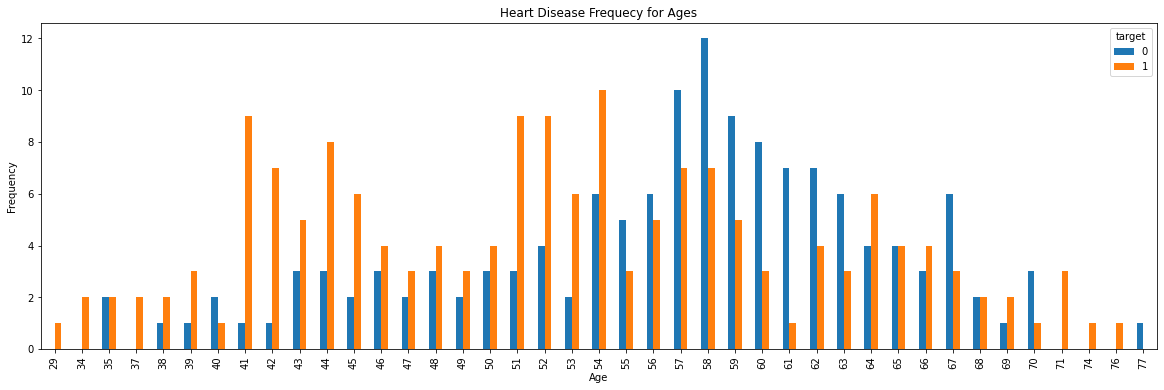

In [19]:
pd.crosstab(df.age,df.target).plot(kind = "bar",figsize=(20,6))
plt.title('Heart Disease Frequecy for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

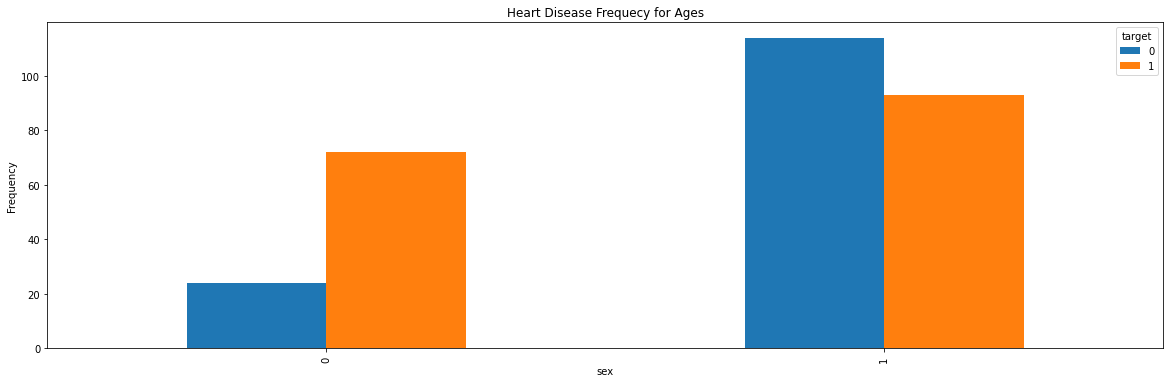

In [21]:
pd.crosstab(df.sex,df.target).plot(kind = "bar",figsize=(20,6))
plt.title('Heart Disease Frequecy for Ages')
plt.xlabel('sex')
plt.ylabel('Frequency')
plt.show()

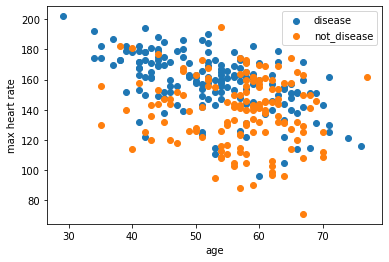

In [22]:
plt.scatter(x=df.age[df.target==1], y = df.thalach[df.target==1])
plt.scatter(x=df.age[df.target==0], y = df.thalach[df.target==0])
plt.legend(["disease", "not_disease"])
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.show()

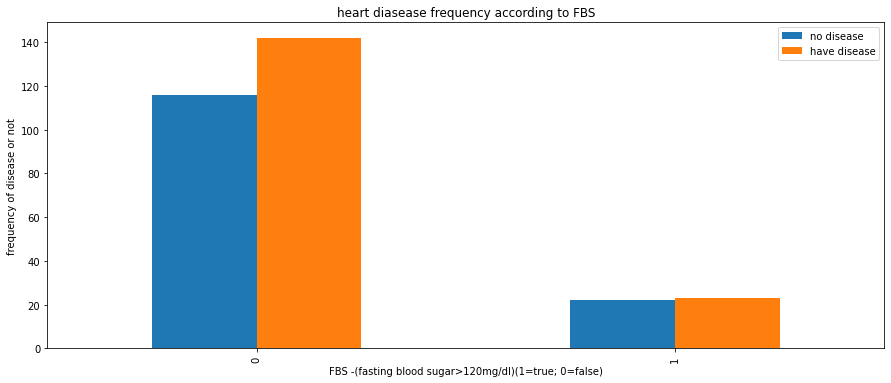

In [23]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6))
plt.title("heart diasease frequency according to FBS")
plt.xlabel("FBS -(fasting blood sugar>120mg/dl)(1=true; 0=false)")
plt.legend(["no disease","have disease"])
plt.ylabel("frequency of disease or not")
plt.show()

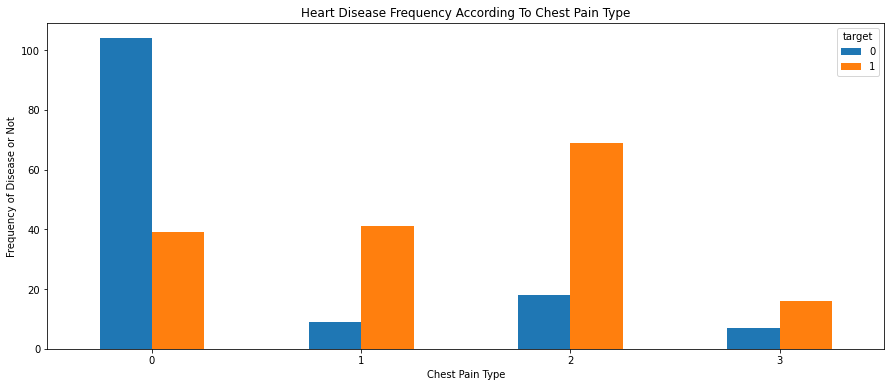

In [24]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [25]:
a= pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'],prefix="thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df,a,b,c]
df=pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [26]:
df= df.drop(columns=['cp','thal','slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [27]:
y= df.target.values
x_data = df.drop(['target'], axis = 1)
x= (x_data - np.min(x_data)) / (np.max(x_data)- np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train = x_train.T
y_train= y_train.T
x_test = x_test.T
y_test = y_test.T

In [29]:
def intialize(dimension):
    weight= np.full((dimension, 1),0.01)
    bias= 0.0
    return weight, bias